<h1 align=center><font size = 5>Classification Models with Keras</font></h1>


## Introduccion

- En esta guia, aprenderemos como usar la libreria Keras para construir modelos para problemas de clasificación. Usaremos el popular dataset MNIST, un dataset de imagenes.

- La base de datos MNIST, abreviatura de la base de datos Modified National Institute of Standards and Technology, es una gran base de datos de dígitos escritos a mano que se usa comúnmente para entrenar varios sistemas de procesamiento de imágenes. La base de datos también se usa ampliamente para capacitación y pruebas en el campo del aprendizaje automático.

- La base de datos del MNIST contiene 60,000 imágenes de capacitación y 10,000 imágenes de prueba de dígitos escritos por estudiantes de secundaria y empleados de la Oficina del Censo de los Estados Unidos.


## Modelos de Clasificacion con Keras

### **Objetivos de este Notebook**

<h5> 1. Uso de la base de datos MNIST para entrenar varios sistemas de procesamiento de imágenes</h5>
<h5> 2. Construya una red neuronal. </h5>
<h5> 3. Entrene y pruebe la red. </h5>



## Importar Keras y paquetes necesarios

- Vamos a comenzar importando Keras y algunos de sus modulos.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

- Ya que estamos tratando con imágenes, también importemos la capa de scripting Matplotlib para ver las imágenes.

In [2]:
import matplotlib.pyplot as plt

- La biblioteca de Keras incluye convenientemente el conjunto de datos MNIST como parte de su API. 

- Entonces, carguemos el conjunto de datos MNIST de la biblioteca de Keras. El conjunto de datos se divide fácilmente en un conjunto de entrenamiento y un conjunto de prueba.

In [3]:
# Importar los datos
from keras.datasets import mnist

# Leer los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

- Confirmemos el número de imágenes en cada conjunto. Según la documentación del conjunto de datos, deberíamos tener 60000 imágenes en X_train y 10000 imágenes en X_test.

In [4]:
X_train.shape

(60000, 28, 28)

- El primer número en la tupla de salida es el número de imágenes y los otros dos números son el tamaño de las imágenes en el conjunto de datos. Entonces, cada imagen tiene 28 píxeles por 28 píxeles.

- Visualicemos la primera imagen del conjunto de entrenamiento utilizando la capa de secuencias de comandos de Matplotlib.

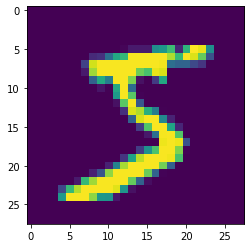

In [5]:
plt.imshow(X_train[0])

- Con las redes neuronales convencionales, no podemos alimentar la imagen como entrada tal como está. Así que necesitamos aplanar las imágenes en vectores unidimensionales, cada uno de tamaño 1 x (28 x 28) = 1 x 784.

In [6]:
#Aplanar imagenes dentro de one-dimensaional vector

num_pixels = X_train.shape[1] * X_train.shape[2] 

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

- Dado que los valores de los píxeles pueden oscilar entre 0 y 255, normalicemos los vectores para que estén entre 0 y 1.


In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

- Finalmente, antes de comenzar a construir nuestro modelo, recuerde que para la clasificación necesitamos dividir nuestra variable objetivo en categorías. Usamos la función to_categorical del paquete Keras Utilities.

In [8]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Construir una Red Neuronal

- Definimos una funcion para construir el modelo de Clasificacion

In [9]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Entrenar y evaluar la red

In [10]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 72s - loss: 0.1855 - accuracy: 0.9441 - val_loss: 0.1036 - val_accuracy: 0.9670
Epoch 2/10
1875/1875 - 76s - loss: 0.0786 - accuracy: 0.9758 - val_loss: 0.0904 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 - 73s - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0845 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 - 87s - loss: 0.0427 - accuracy: 0.9859 - val_loss: 0.0792 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 - 82s - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0808 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 - 82s - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0851 - val_accuracy: 0.9800
Epoch 7/10
1875/1875 - 81s - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0877 - val_accuracy: 0.9775
Epoch 8/10
1875/1875 - 87s - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.1163 - val_accuracy: 0.9741
Epoch 9/10
1875/1875 - 86s - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0987 - val_accuracy: 0.9780
Epoch 10/10
1875/1875 - 94s - loss: 0.0168 - accuracy: 0.9945 - val_loss:

- Visualizamos la precision y el correspondiente Error.

In [11]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9815999865531921% 
 Error: 0.01840001344680786


- Ejecutar 10 épocas en realidad podría llevar más de 20 minutos. Pero disfrute de los resultados a medida que se generan.

- A veces, no puede darse el lujo de volver a entrenar su modelo cada vez que quiera usarlo, especialmente si tiene limitados recursos computacionales y el entrenamiento de su modelo puede llevar mucho tiempo. Por lo tanto, con la biblioteca de Keras, puede guardar su modelo después del entrenamiento. Para hacer eso, usamos el método de guardar.

In [12]:
model.save('classification_model.h5')

- Dado que nuestro modelo contiene matrices multidimensionales de datos, los modelos generalmente se guardan como archivos .h5.

- Cuando esté listo para usar su modelo nuevamente, use la función **load_model** from **keras.models**

In [13]:
from keras.models import load_model

In [14]:
pretrained_model = load_model('classification_model.h5')